In [1]:
start_date='2022-11-01 00:00:00'
end_date='2022-12-01 00:00:00'

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

In [3]:
os.chdir(r'\\192.168.21.16\Area 02A sharing\Spread Sheets\2022')

In [4]:
df_lab=pd.read_excel('spread Penex 2016.xlsm', header = None,sheet_name='Lab Archive')
df_macro=pd.read_excel('spread Penex 2016.xlsm', header = None,sheet_name='Macro Archive')
df_summ=pd.read_excel('spread Penex 2016.xlsm', header = None,sheet_name='SummaryArchive')
#df=pd.read_excel('spread Penex 2016.xlsm', header = None,sheet_name='SummaryArchive')

In [5]:
df_summ=df_summ.iloc[1:,:]
df_summ.reset_index(drop=True,inplace=True)

In [6]:
for i in df_summ.columns:
    try:
        if type(df_summ.loc[0,i+1])!=str:
            df_summ.loc[0,i+1]=df_summ.loc[0,i]
    except:
        pass

In [7]:
df_lab=df_lab.iloc[1:,:]
df_lab.reset_index(drop=True,inplace=True)

In [8]:
for i in df_lab.columns:
    try:
        if type(df_lab.loc[0,i+1])!=str:
            df_lab.loc[0,i+1]=df_lab.loc[0,i]
    except:
        pass

In [9]:
def prepare(data):
    df=data.copy()
    df.columns=df.iloc[0:3].fillna('').astype(str).apply(' '.join).str.strip()
    df=df.iloc[3:]
    df.columns=df.columns.str.replace(" ","_")
    df.columns=df.columns.str.lower()
    df.columns=df.columns.str.replace("-","_")
    df.reset_index(drop=True, inplace=True)
    df=df.replace('No Data',np.nan)
    df=df.replace('No Lab Data',np.nan)
    df=df.replace('-',np.nan)
    df=df.replace('Nil',0)
    return df

In [10]:
def outlier_columns(df,a=4):
    z_scores = stats.zscore(df[df.describe().columns])
    z_scores.fillna(0,inplace=True)
    abs_z_scores = np.abs(z_scores)
    (abs_z_scores>a).any(axis=0)
    outliers_columns=abs_z_scores.columns[(abs_z_scores>a).any(axis=0)]
    return df[outliers_columns]

In [11]:
def to_float(data):
    df=data.copy()
    for column in df.columns:
        try:
            df[column]=df[column].astype(float)
        except:
            continue
    return df

In [12]:
def to_number(df):
# converting dataframe to numeric values, all other non-numbers will converted to Nan
    for column in df.columns:
        df[column]=pd.to_numeric(df[column],errors='coerce')
    return df

In [13]:
df_summ=prepare(df_summ)

In [14]:
df_lab=prepare(df_lab)

In [15]:
df_macro=prepare(df_macro)

In [16]:
df_macro=df_macro.drop(0).reset_index(drop=True)

In [17]:
df_macro['date_to_be_summarized:']=pd.to_datetime(df_macro['date_to_be_summarized:'])

In [18]:
df_lab_period=df_lab[(df_lab['operating_day_dd/mm/yyyy']> start_date) & (df_lab['operating_day_dd/mm/yyyy']< end_date)]
df_summ_period=df_summ[(df_summ['fron_dd/mm/yyyy']> start_date) & (df_summ['fron_dd/mm/yyyy']< end_date)]
df_macro_period=df_macro[(df_macro['date_to_be_summarized:']> start_date) & (df_macro['date_to_be_summarized:']< end_date)]

In [19]:
df_summ_period = df_summ_period.T.drop_duplicates().T
df_macro_period = df_macro_period.T.drop_duplicates().T
df_lab_period = df_lab_period.T.drop_duplicates().T

In [20]:
df_macro_period=to_float(df_macro_period)
df_summ_period=to_float(df_summ_period)
df_lab_period=to_float(df_lab_period)


In [21]:
df_lab_period.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 7582 to 7610
Columns: 134 entries, operating_day_dd/mm/yyyy to 05_sc_12_(stabilized_c5+_isomerate_product)_raw_total_wt%
dtypes: datetime64[ns](1), float64(131), object(2)
memory usage: 31.6+ KB


In [22]:
df_summ_period.dropna(axis=1,how='any',inplace=True,thresh=df_summ_period.shape[0]*0.65)
df_summ_period.reset_index(drop=True,inplace=True)
df_macro_period.dropna(axis=1,how='any',inplace=True,thresh=df_macro_period.shape[0]*0.65 )
df_macro_period.reset_index(drop=True,inplace=True)
#df_lab_period.drop('hcl_ppm',axis=1,inplace=True)
#df_lab_period.dropna(axis=1,how='any',inplace=True,thresh=df_lab_period.shape[0]*0.65)
#df_lab_period.reset_index(drop=True,inplace=True)

In [23]:
df_summ_period.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Columns: 226 entries, fron_dd/mm/yyyy to additional_unit_flows_information_dih_btms_rvp_(calc)_bar(g)
dtypes: datetime64[ns](1), float64(217), object(8)
memory usage: 51.3+ KB


# FNISHED CLEANING

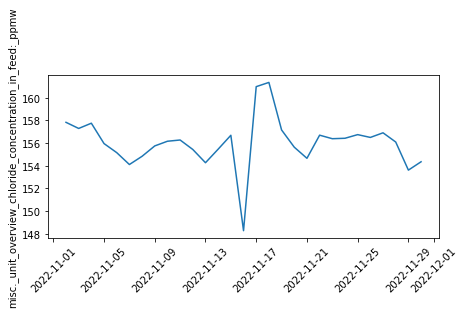

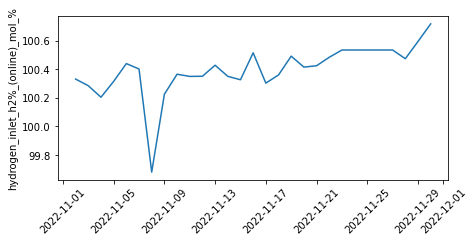

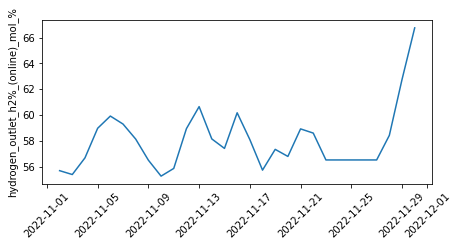

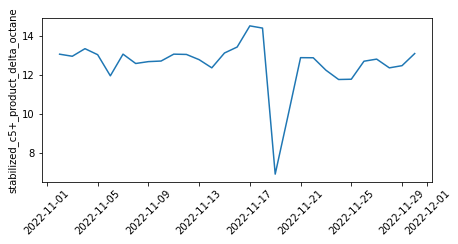

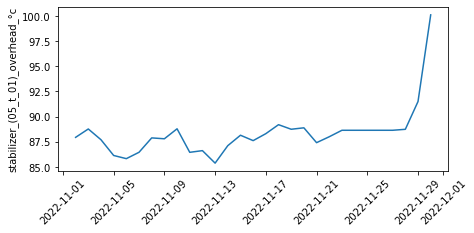

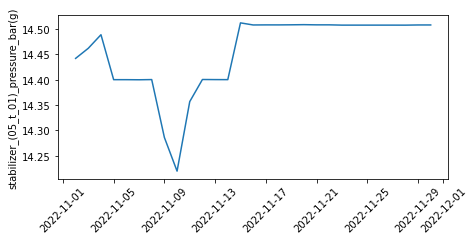

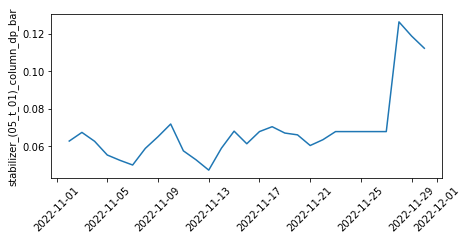

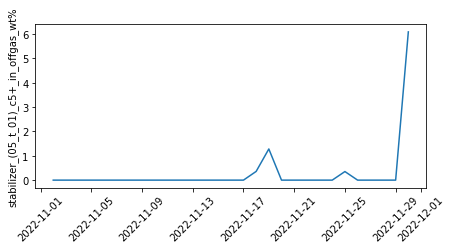

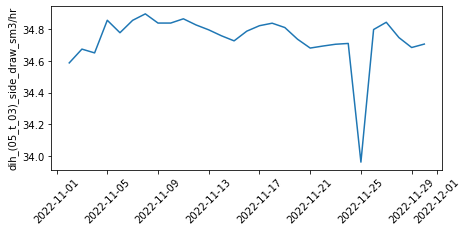

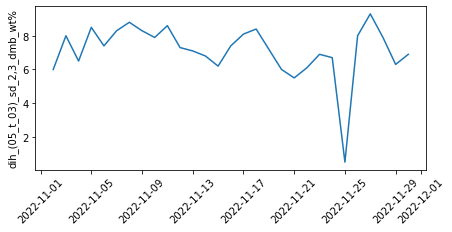

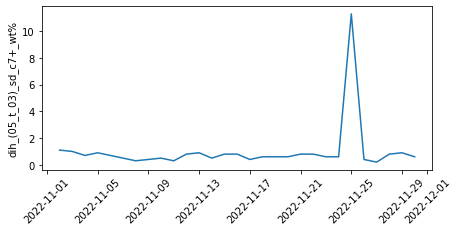

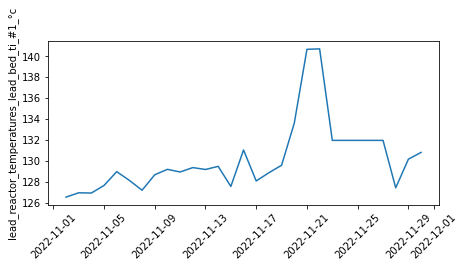

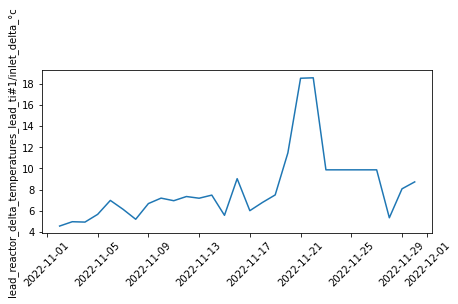

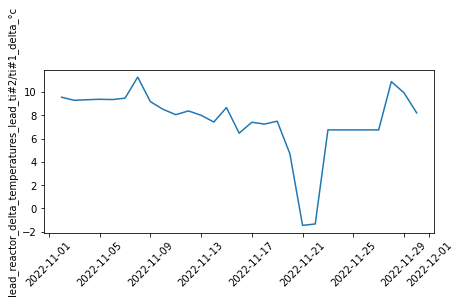

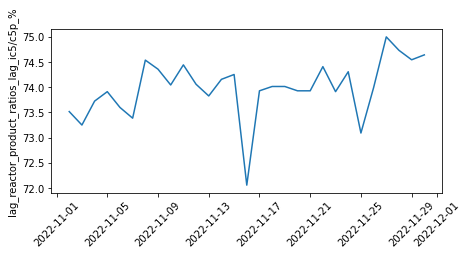

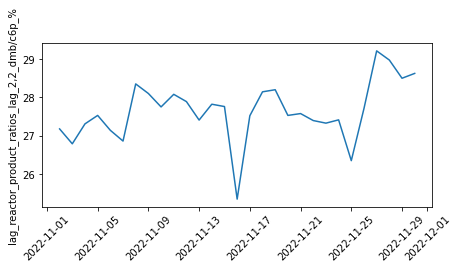

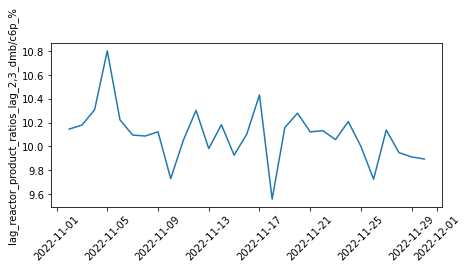

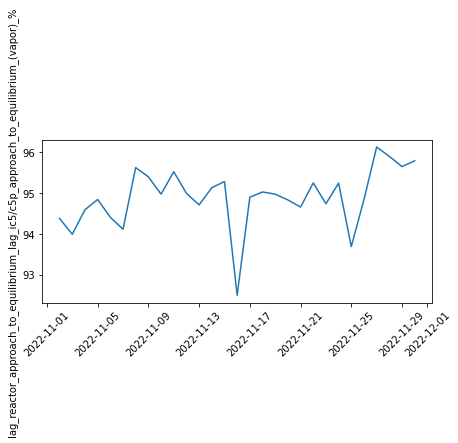

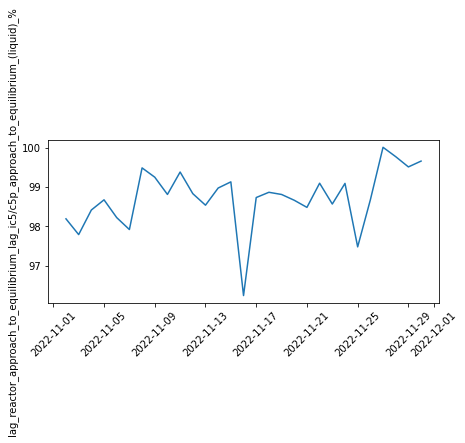

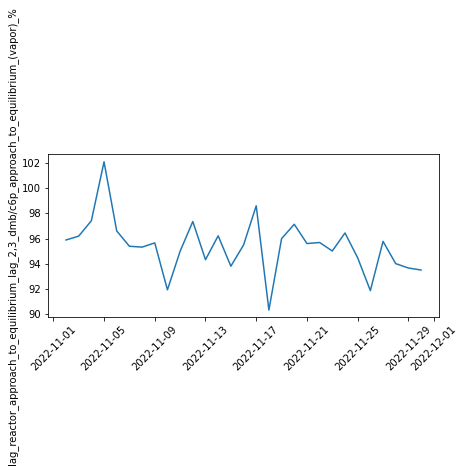

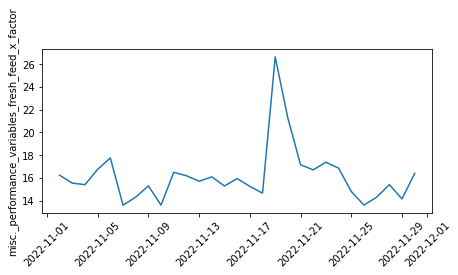

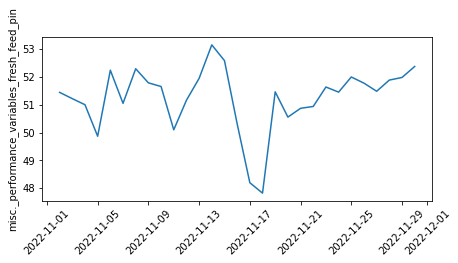

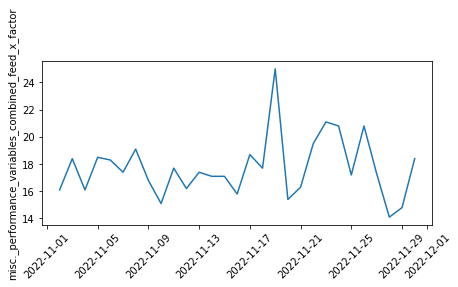

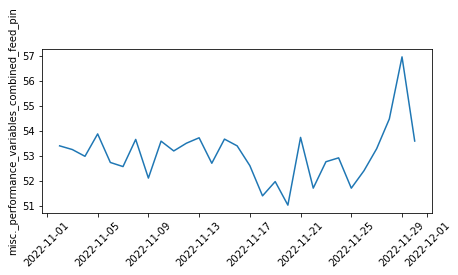

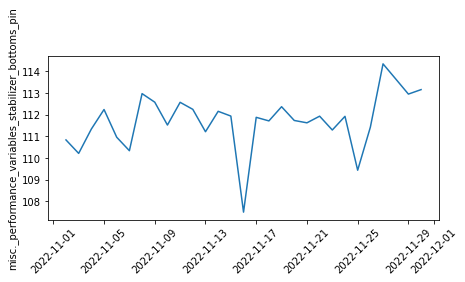

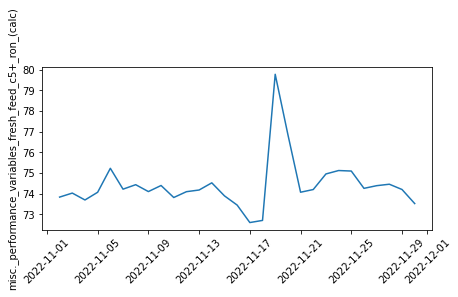

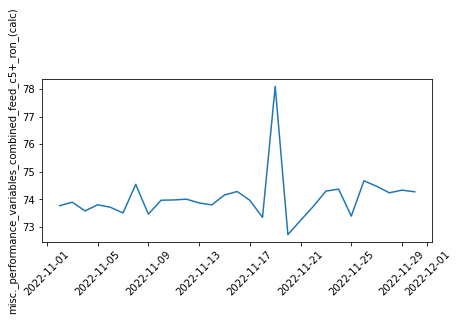

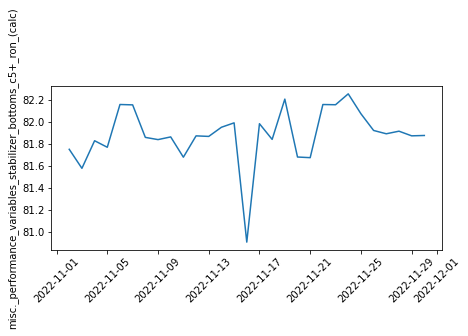

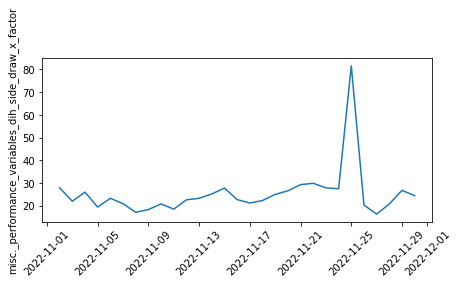

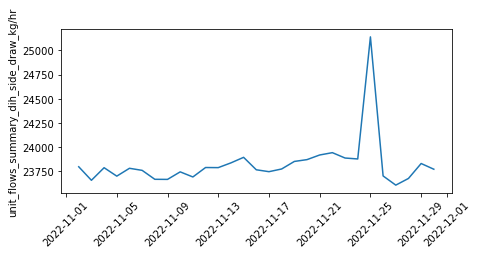

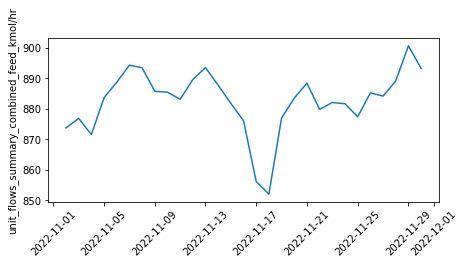

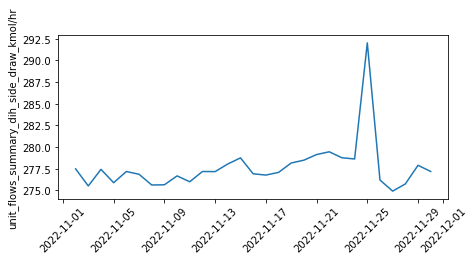

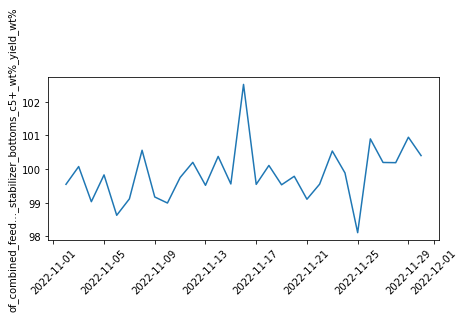

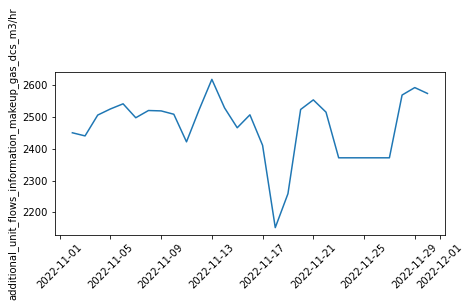

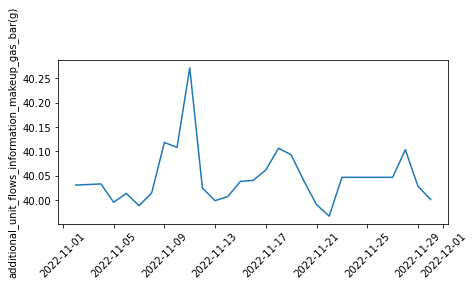

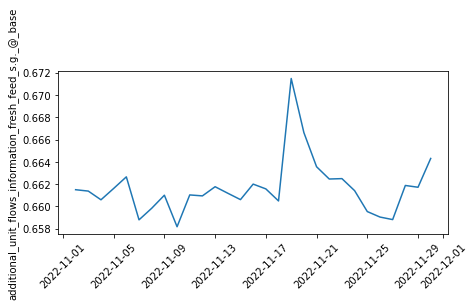

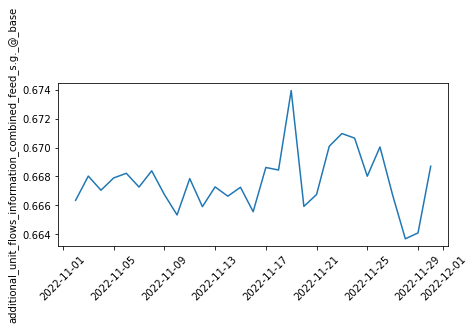

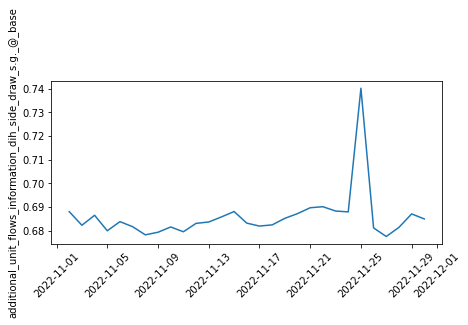

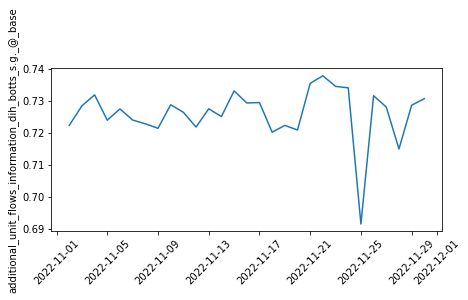

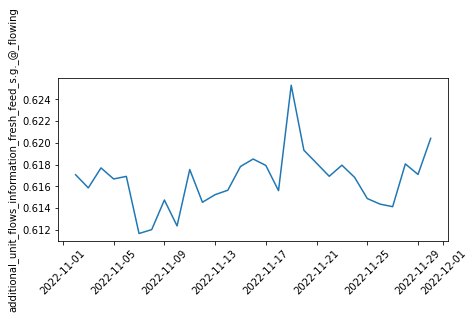

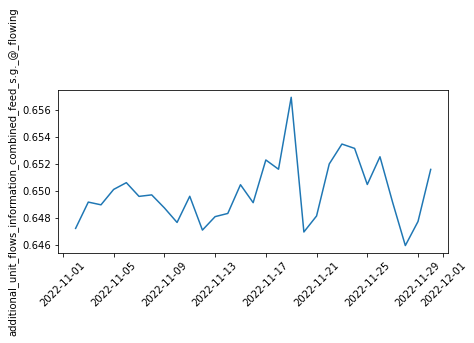

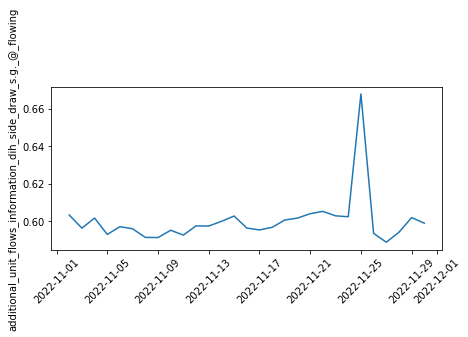

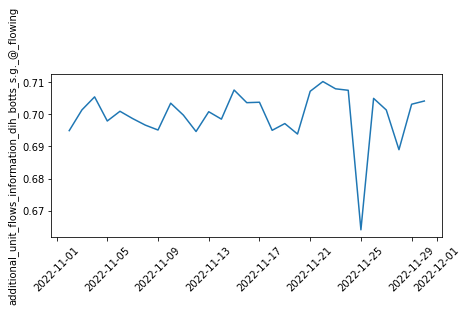

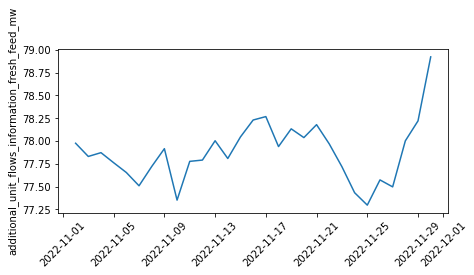

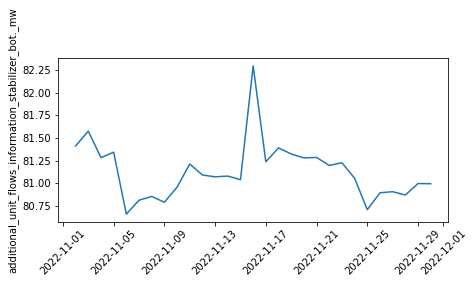

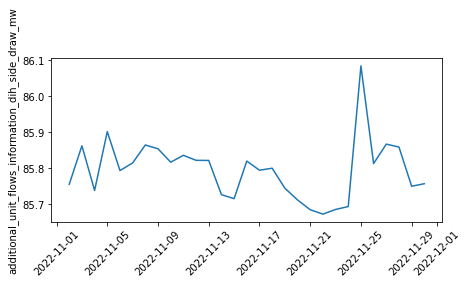

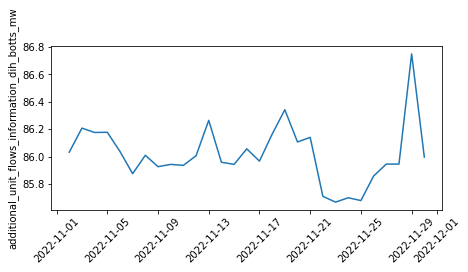

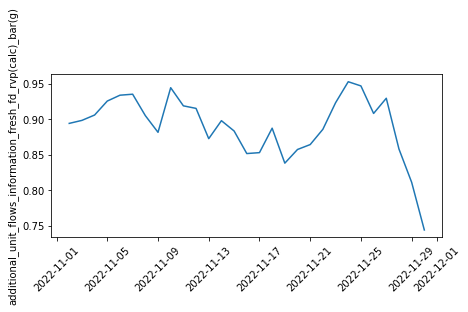

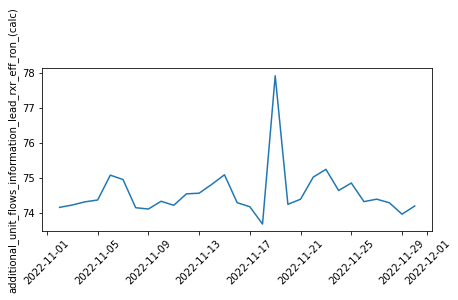

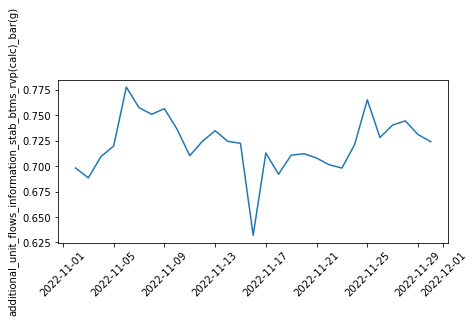

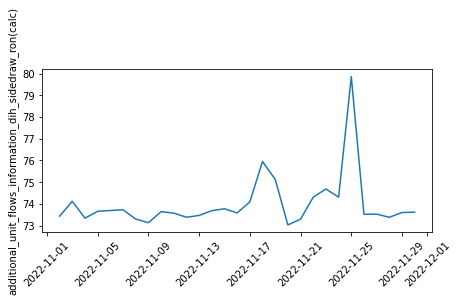

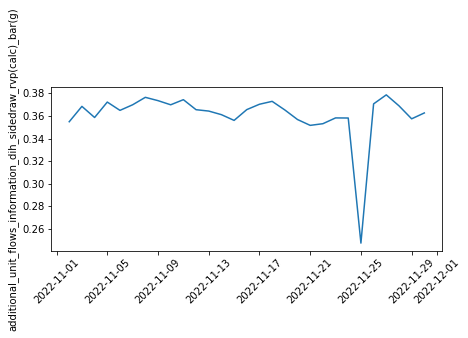

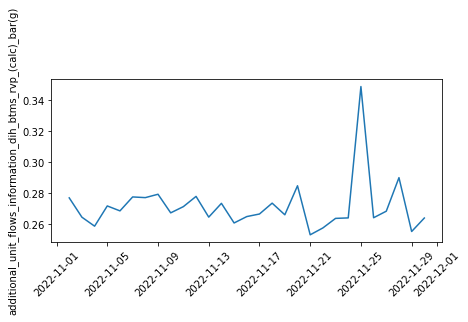

In [24]:
for i in outlier_columns(df_summ_period,3).columns:
    try:
        fig, ax = plt.subplots(figsize=(7,3))
        ax.plot(df_summ_period['fron_dd/mm/yyyy'],df_summ_period[i])
        ax.set_ylabel(i)
        ax.set_ylabel(i)
        plt.xticks(rotation=45)
        plt.show()
    except:
        pass


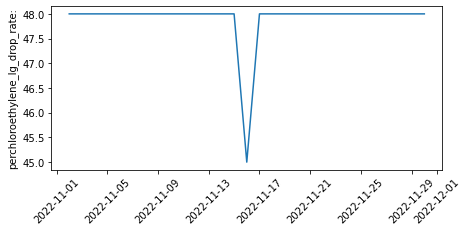

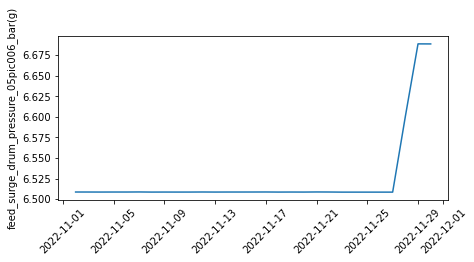

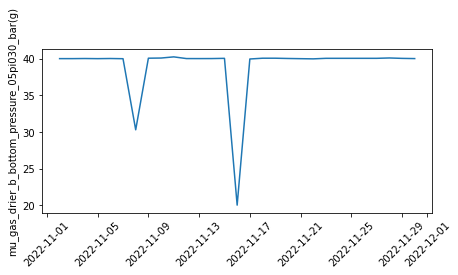

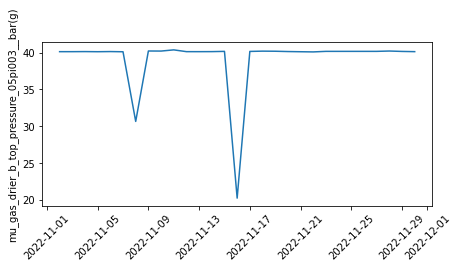

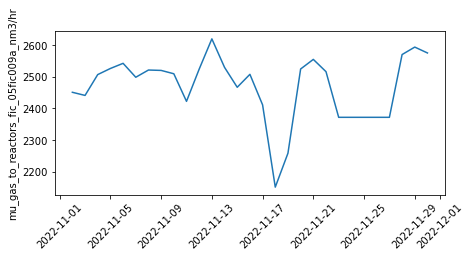

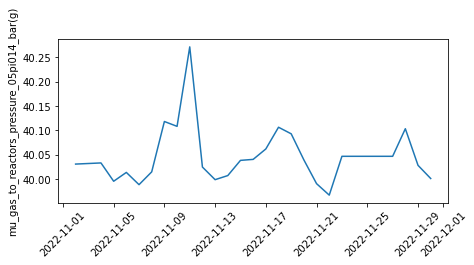

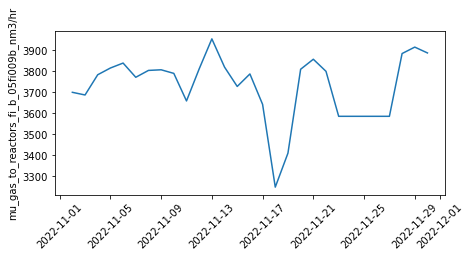

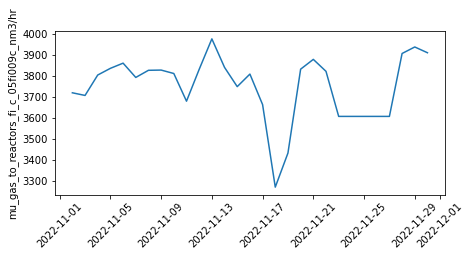

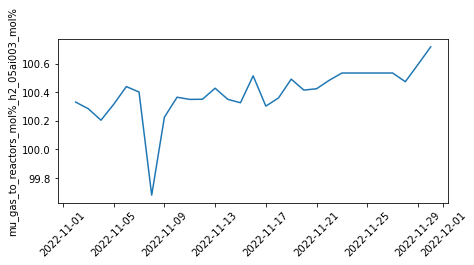

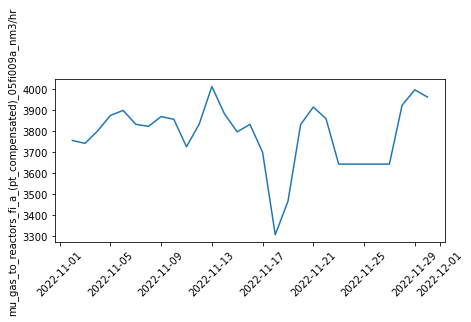

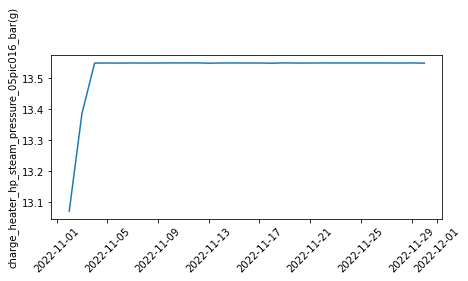

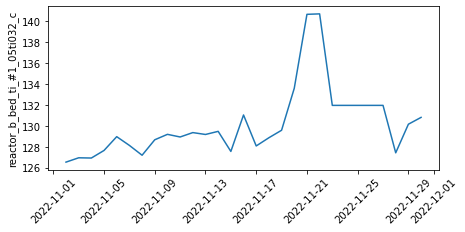

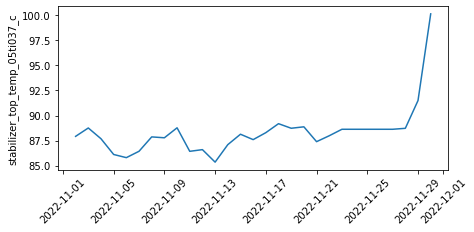

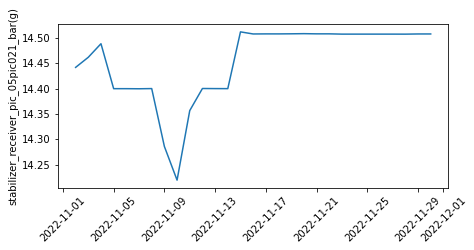

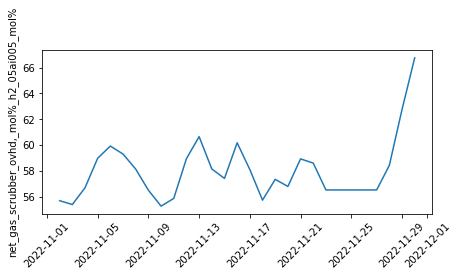

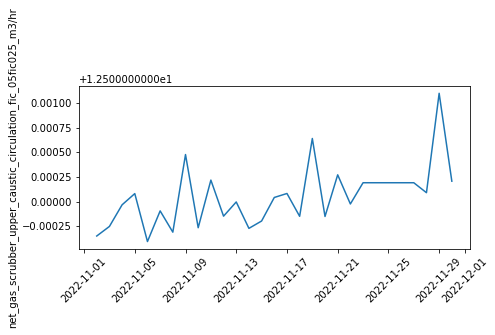

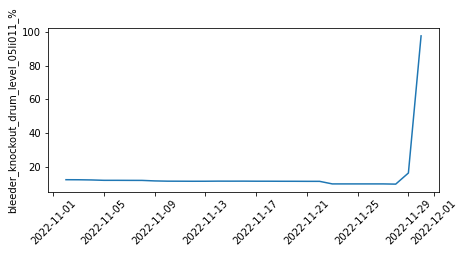

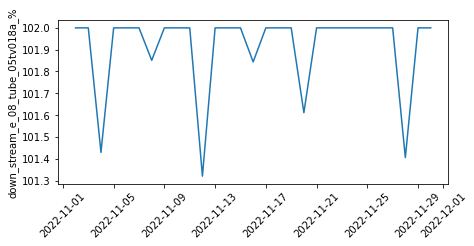

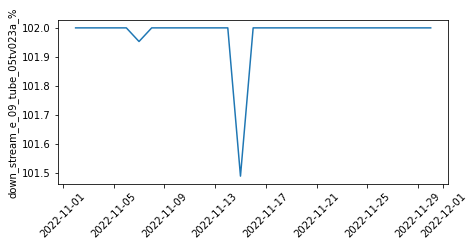

In [25]:
for i in outlier_columns(df_macro_period,3).columns:
    try:
        fig, ax = plt.subplots(figsize=(7,3))
        ax.plot(df_macro_period['date_to_be_summarized:'],df_macro_period[i])
        ax.set_ylabel(i)
        ax.set_ylabel(i)
        plt.xticks(rotation=45)
        plt.show()
    except:
        pass


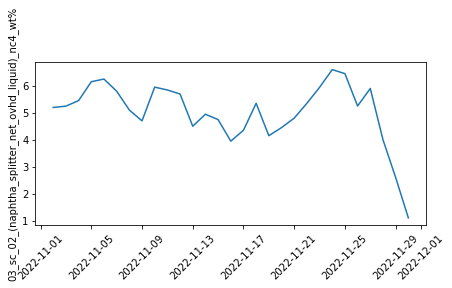

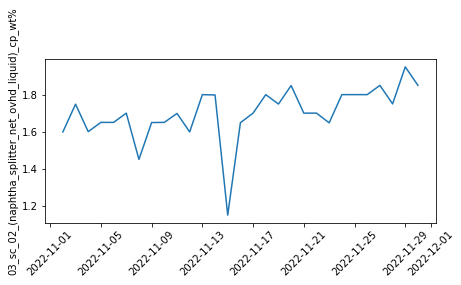

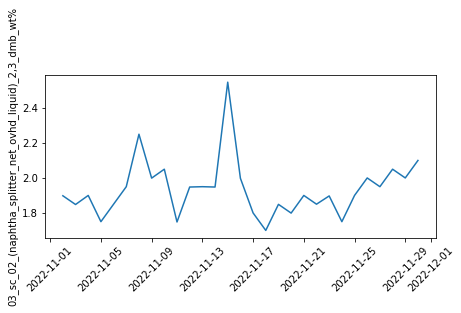

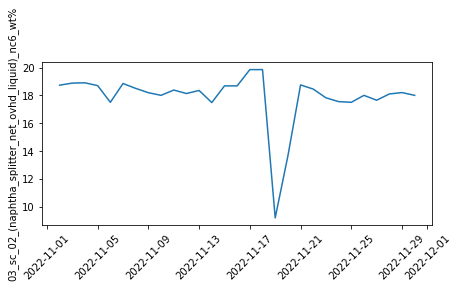

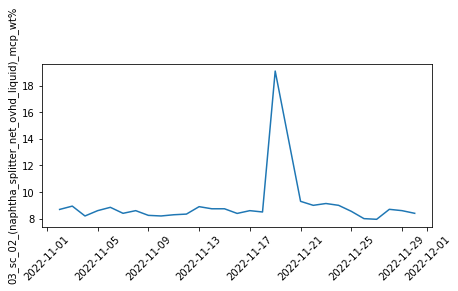

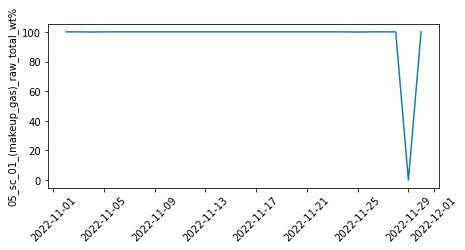

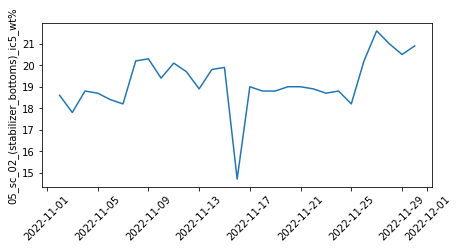

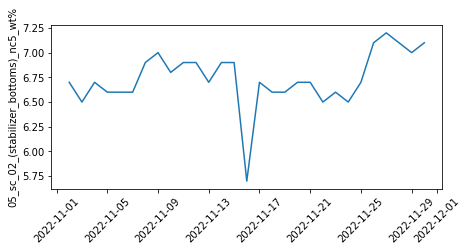

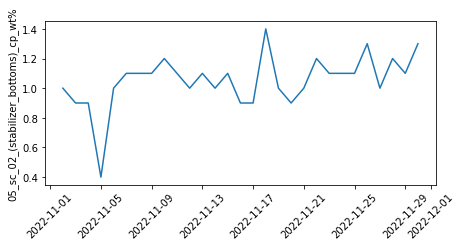

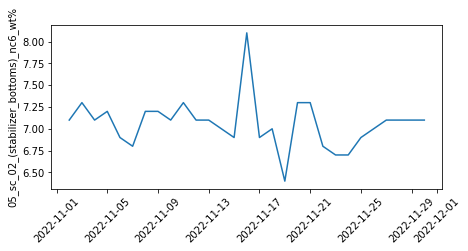

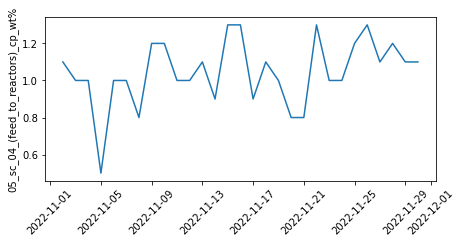

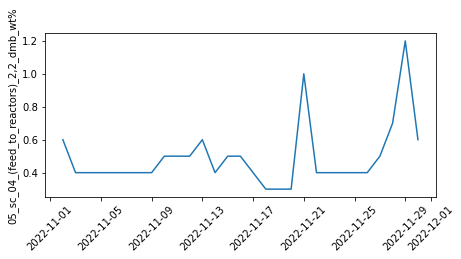

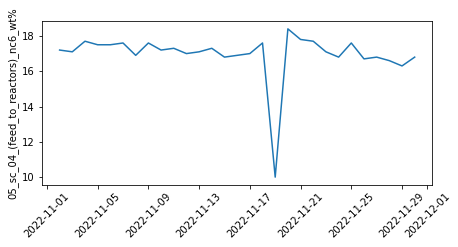

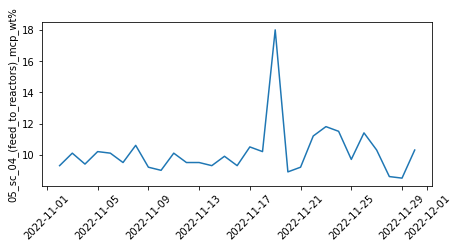

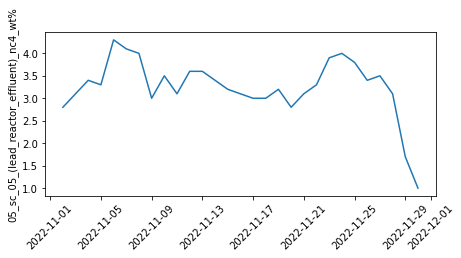

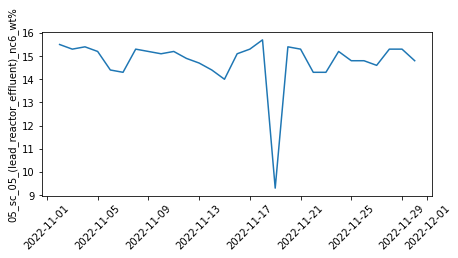

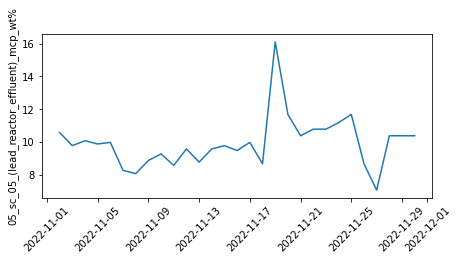

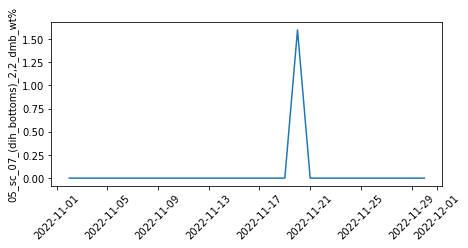

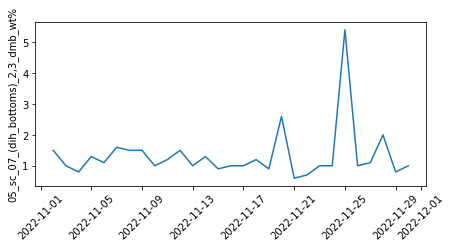

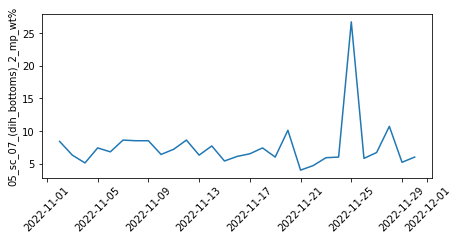

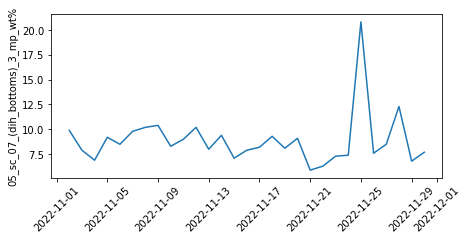

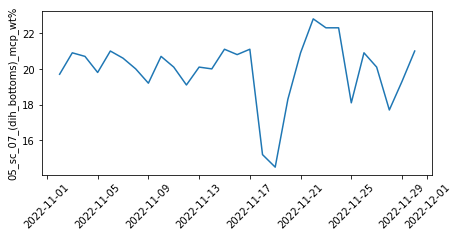

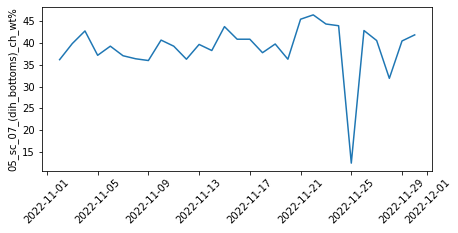

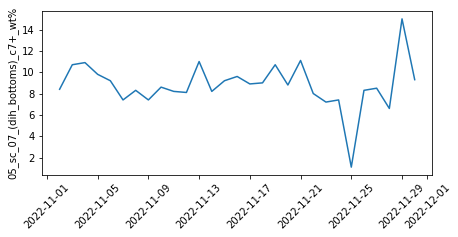

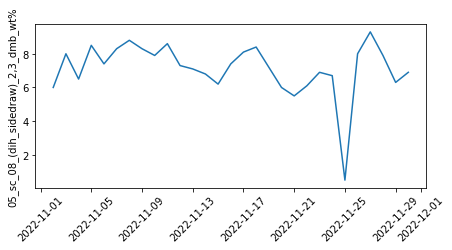

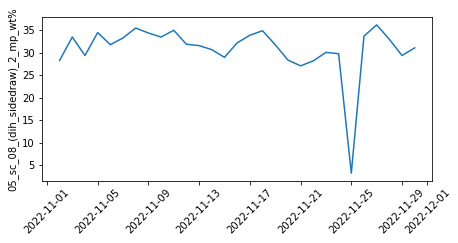

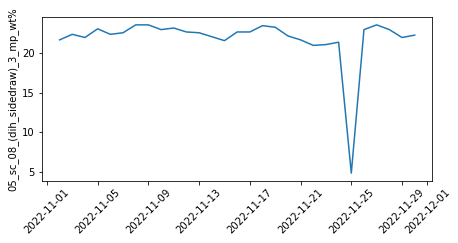

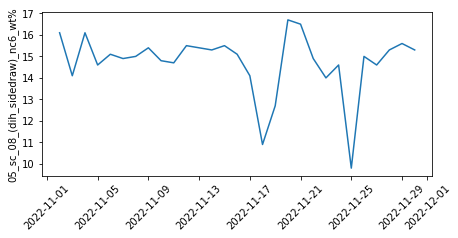

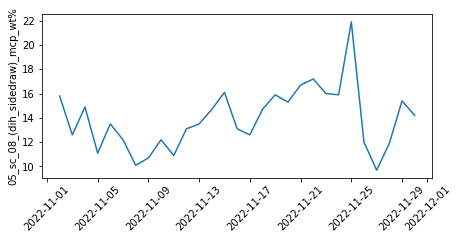

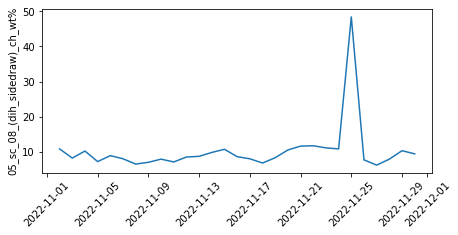

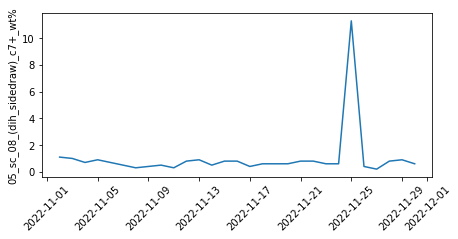

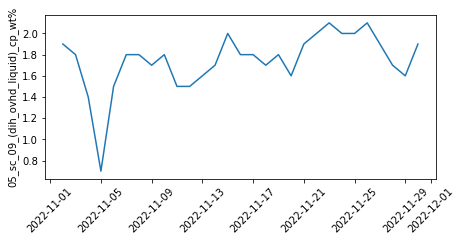

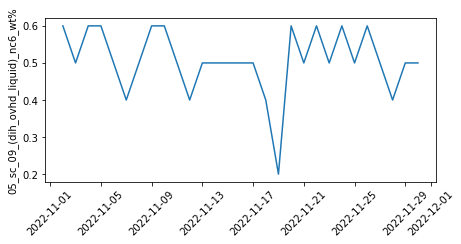

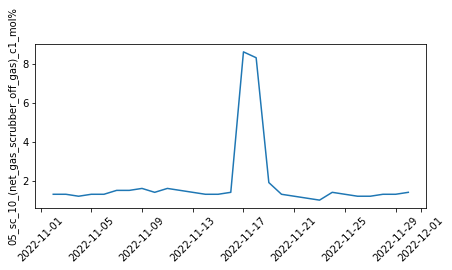

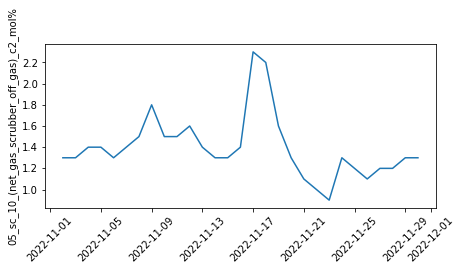

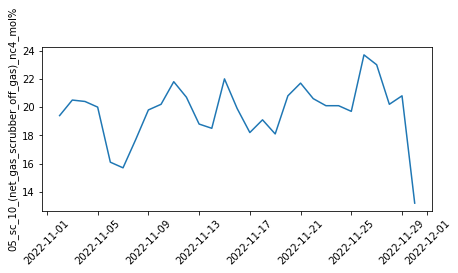

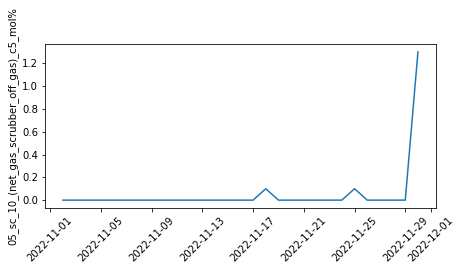

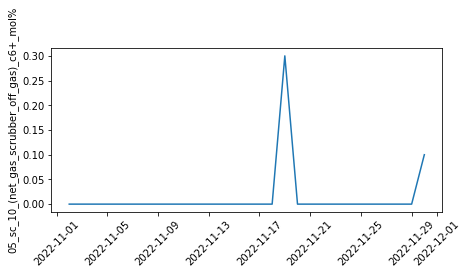

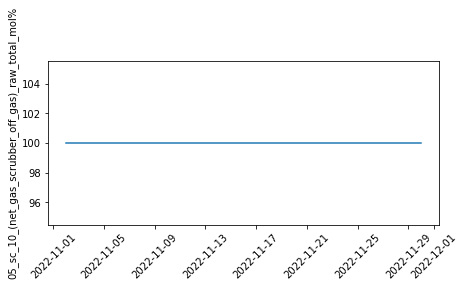

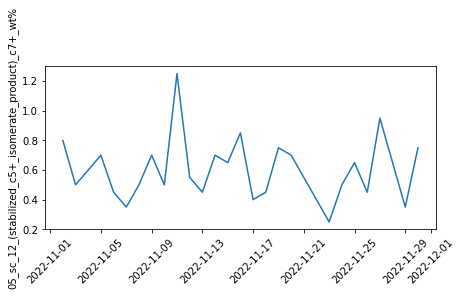

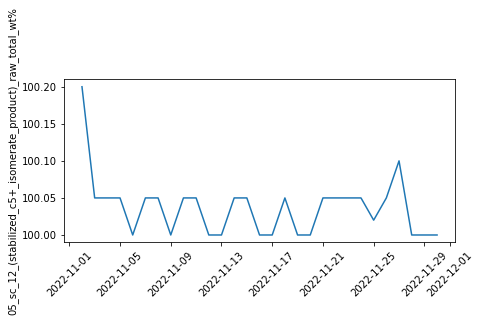

In [26]:
for i in outlier_columns(df_lab_period,3).columns:
    try:
        fig, ax = plt.subplots(figsize=(7,3))
        ax.plot(df_lab_period['operating_day_dd/mm/yyyy'],df_lab_period[i])
        ax.set_ylabel(i)
        ax.set_ylabel(i)
        plt.xticks(rotation=45)
        plt.show()
    except:
        pass